In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import common as cm

# A-star algorithm

This exercise consists of only one part. Finish it to get a mark of 5.0.

The task of the A* algorithm is to find the shortest path between two nodes in the graph. This algorithm is often used to find the shortest path on a 2d map. In this case, nodes are different possible positions (fields), and edges from nodes in the graph lead to adjacent fields. See the example map below:

(0, 7) (9, 0)


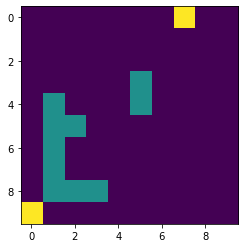

In [2]:
position_start, position_target, terrain  = cm.getSmallExample()
#print(terrain)
### THE NEXT 2 LINES: OVERRIDE SOME CELLS IN THE MATRIX TO SHOW START/STOP LOCATIONS
terrain[position_start[0]][position_start[1]] = 2 ### START
terrain[position_target[0]][position_target[1]] = 2 ### START
### CYAN LOCATIONS = OBSTACLES
plt.imshow(terrain) 
print(str(position_start) + " " + str(position_target))

You can consider even bigger case:

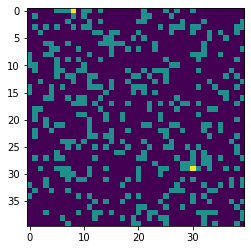

In [3]:
position_start, position_target, terrain  = cm.getBigExample()
terrain[position_start[0]][position_start[1]] = 2 ### START
terrain[position_target[0]][position_target[1]] = 2 ### START
plt.imshow(terrain) 

So, in this exercaise, you are asked to implement the A* algorithm for finding the shortest path leading from the source to the target point. The path shall avoid obstacles. 

Below you can find a list of possible moves when traversing through the graph (map). A movement, e.g., (-1, 1), is a translation vector (you move -1 to the left and +1 above). 

In [4]:
possible_moves = [(i-1,j-1) for i in range(3) for j in range(3) if i !=1 or j !=1]
print(possible_moves)

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]


You can run your program for different possible moves values. Below, the costs associated with the possible moves are provided. These are computed using the Euclidean distance. 

In [5]:
possible_moves_costs = [math.sqrt(abs(i)**2+abs(j)**2) for i,j in possible_moves]
print(possible_moves_costs)

[1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951]


1.1) Below you can find a class that implements a graph node. Get acquainted with the provided descriptions. Complete the function estimatePathLenght calculating the value of f, based on the node's actual distance from the source g computed using the Euclidean distance.

In [36]:
class Node():
    def __init__(self, parent, position):
        self.parent = parent # a reference to the previous (parent) node in the path
        self.position = position # node's (x, y) position in the map       
        self.g = 0 # g is the actual cost from the source to the node,
        self.f = 0 # f is the estimation of the length of the path from the source to the target, 
                   # passing through the node (i.e., g(x) + h(x)).
        self.step = 0 # it says in which step the node was created (visited).
        
    def __eq__(self, other): ### to check whether two nodes are equal, i.e., takes the same positions
        return self.position == other.position 
    
    def updateG(self, cost): ### update the cost based on its parent's cost. 
        self.g = self.parent.g + cost        
        
    def getPath(self): ### get a path (list of positions) from the source to this node
                       ### this is a recusive method calling self.parent.getPath()
        if self.parent is None:
            return [self.position]
        else:
            return self.parent.getPath() + [self.position]
        
def estimatePathLenght(self, target):      
        #TODO
        self.f = self.g+math.sqrt((self.position[0]-target.position[0])**2+(self.position[1]-target.position[1])**2)
        return self.f

The below function that checks whether a given position is attainable, i.e., not out of range or being an obstacle (terrain[] == 1).

In [7]:
def validPosition(position, terrain):
    if position[0] < 0 or position[1] < 0 or position[0] >= terrain.shape[0] or position[1] >= terrain.shape[1]:
        #terrain shape is greates x and y possible
        return False
    if  terrain[position] == 1:
        #print("PRZESZKODA")
        return False
    return True    

1.2) Complete the below implementation of the A * algorithm. 



1) Find all neighbours (positions) for the considered node. Keep only these positions that are correct. <br>
2) For each such a neighbour, create a new node (child/neighbour) whose parent is the node being considered.<br>
3) Calculate the child's g value using the cost of transition from node to child.<br>
4) Check if the child node has already been visited (closed set).<br>
5) If not then check if there is a node on the open set (unvisited) with the same position but a smaller g-value (it's closer to the source).<br>
6) If not, calculate the estimated distance from source to destination through the child and add this node to the list to check.<br>
7) After generating all adjacent nodes, sort the open set list so that the next considered node has the smallest f value.<br>

The algorithm returns a node whose position is the same as the target position and which stores the entire path through the parent field.

In [34]:
def A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs):
    root = Node(None, position_start) ### THE SOURCE NODE
    target = Node(None,position_target) ### THE TARGET NODE
    
    closed_set = []
    open_set = []
    open_set.append(root)
    step = 0
    root.step = step 
    while(len(open_set)>0):
        first_n = open_set.pop(0)
        closed_set.append(first_n) 
        step += 1 
        first_n.step = step
        if first_n == target:
            return first_n, closed_set
        for i, j in zip(possible_moves, possible_moves_costs):
            node_position = (first_n.position[0] + i[0], first_n.position[1] + i[1])
            if validPosition(node_position, terrain) is False:
                continue
            new_node = Node(first_n, node_position)
            new_node.updateG(j)
            for closed_child in closed_set:
                if new_node == closed_child:
                    continue
            for open_child in open_set:
                if new_node == open_child and new_node.g < open_child.g:
                    continue
                elif new_node == open_child and new_node.g >= open_child.g:
                    open_set.remove(open_child)
            lst = []
            for i in open_set:
                sm_lst = []
                i.f = i.estimatePathLenght(target)
                sm_lst.append(i)
                sm_lst.append(i.f)
                lst.append(sm_lst)
            lst.sort(key = lambda x : x[1])
            open_set.clear()
            for i in range(len(lst)):
                open_set.append(lst[i][0])


In [35]:
path, closed_set = A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs)
cm.plotPath(terrain, path)
print(path.g)
print(path.step)

TypeError: cannot unpack non-iterable NoneType object

40.11269837220809
1091


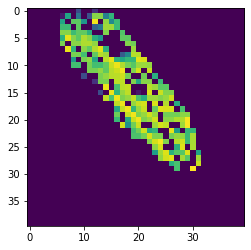

In [23]:
cm.plotSteps(terrain,closed_set)
print(path.g)
print(path.step)

1.4) Find the shortest path for the "big example":

In [12]:
# HERE YOU CAN LOAD AND DISPLAY EXAMPLE RESULTS
plt.imshow(plt.imread("big_path.png"))

FileNotFoundError: [Errno 2] No such file or directory: 'big_path.png'

In [ ]:
plt.imshow(plt.imread("big_steps.png"))

40.11269837220809
1091


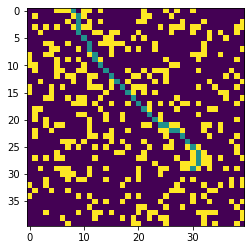

In [13]:
### VERIFY YOUR IMPLEMENTATION HERE
position_start, position_target, terrain  = cm.getBigExample()
path, closed_set = A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs)
cm.plotPath(terrain, path)
print(path.g)
print(path.step)

40.11269837220809
1091


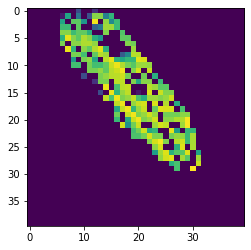

In [14]:
cm.plotSteps(terrain,closed_set)
print(path.g)
print(path.step)